In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (15,8)

pd.options.mode.chained_assignment = None

In [5]:
df = pd.read_csv('C:/Users/91169/Desktop/Portfolio Project/movies.csv')

In [6]:
#  Checking a few rows of data

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [7]:
#  Check total null values for each column of the table

df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [8]:
#  Split 'released' column into two new columns

df[['released date', 'released country']] = df['released'].str.split('(',expand = True)

In [9]:
df['released country'] = df['released country'].str.replace(')', ' ',regex=True)

In [10]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released date,released country
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,"June 13, 1980",United States
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,"July 2, 1980",United States
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,"June 20, 1980",United States
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,"July 2, 1980",United States
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,"July 25, 1980",United States


In [11]:
#  Drop the unuseful column 'released'

df = df.drop(columns = 'released')

In [12]:
df.head()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,released date,released country
0,The Shining,R,Drama,1980,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,"June 13, 1980",United States
1,The Blue Lagoon,R,Adventure,1980,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,"July 2, 1980",United States
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,"June 20, 1980",United States
3,Airplane!,PG,Comedy,1980,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,"July 2, 1980",United States
4,Caddyshack,R,Comedy,1980,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,"July 25, 1980",United States


In [13]:
#  Change 'released date' column to date_time dypes

df['released date'] = pd.to_datetime(df['released date'])
df_cleaned=df

In [14]:
df_cleaned.dtypes

name                        object
rating                      object
genre                       object
year                         int64
score                      float64
votes                      float64
director                    object
writer                      object
star                        object
country                     object
budget                     float64
gross                      float64
company                     object
runtime                    float64
released date       datetime64[ns]
released country            object
dtype: object

In [15]:
#  pd.set_option('display.max_rows',None)

#  This method can help you visualize all the data

#  However, it will load the data slowly

In [16]:
#  Sort the data set by 'gross'

df_cleaned.sort_values(by='gross', ascending=False)

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,released date,released country
5445,Avatar,PG-13,Action,2009,7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0,2009-12-18,United States
7445,Avengers: Endgame,PG-13,Action,2019,8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0,2019-04-26,United States
3045,Titanic,PG-13,Drama,1997,7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0,1997-12-19,United States
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0,2015-12-18,United States
7244,Avengers: Infinity War,PG-13,Action,2018,8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0,2018-04-27,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0,2020-10-23,United States
7664,Dream Round,NaN,Comedy,2020,4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0,2020-02-07,United States
7665,Saving Mbango,NaN,Drama,2020,5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN,2020-04-27,Cameroon
7666,It's Just Us,NaN,Drama,2020,NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0,2020-10-01,United States


In [17]:
#  Drop rows if there are any duplicates

#  Clearly, there are none duplicates

df_cleaned = df_cleaned.drop_duplicates()
df_cleaned.shape[0]

7668

 **Assumptions**: 

1. High budgets tends to have high correlation with gross

2. More Votes tends to have high correlation with gross

Text(0, 0.5, 'gross')

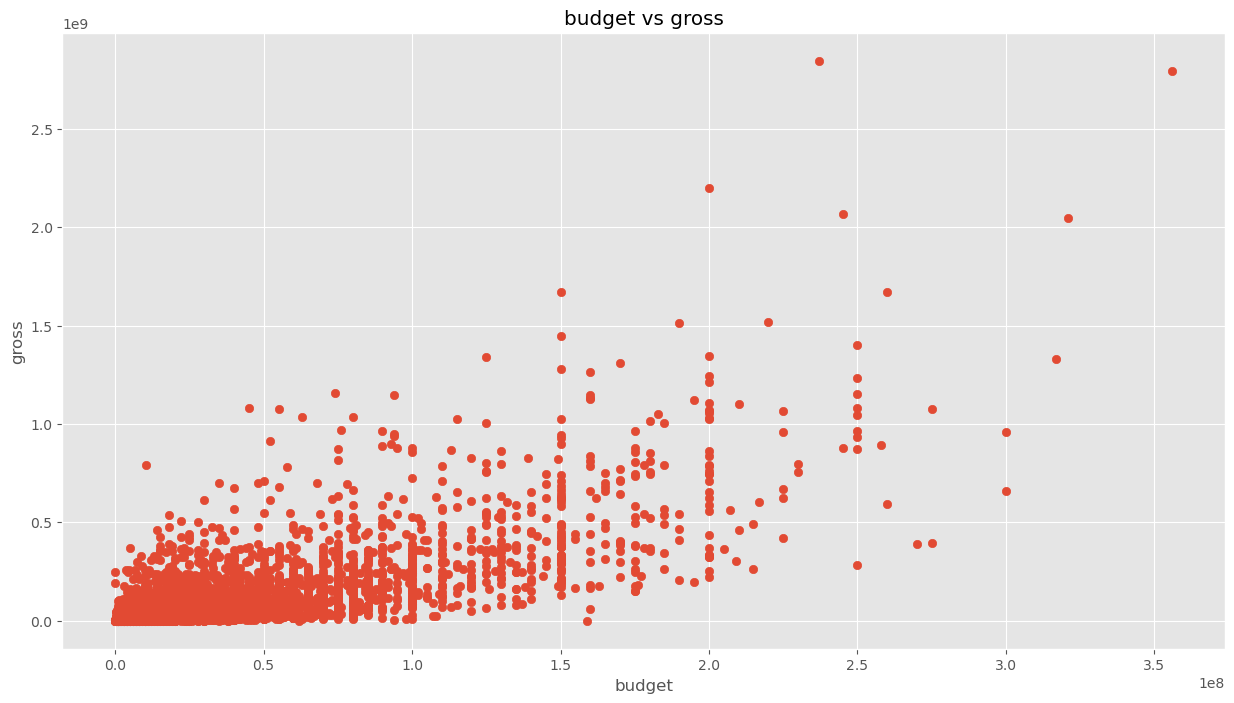

In [18]:
# scatter plot with budget and gross

plt.scatter(x = df_cleaned['budget'], y = df_cleaned['gross'])
plt.title('budget vs gross')
plt.xlabel('budget')
plt.ylabel('gross')


<AxesSubplot:xlabel='budget', ylabel='gross'>

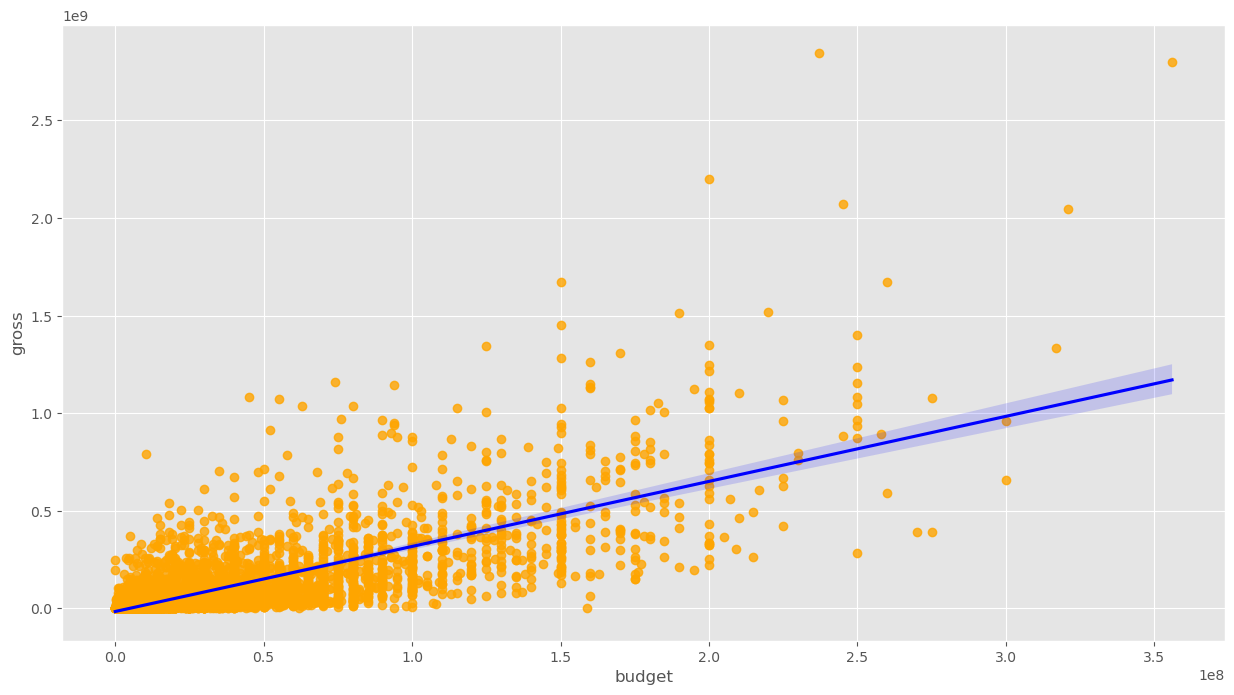

In [19]:
#  Regression plot with budget and gross 

sns.regplot(data=df_cleaned, x='budget', y='gross', scatter_kws={'color' : 'orange'}, line_kws={'color' : 'blue'})

In [20]:
df_cleaned.corr(method='pearson') # method = 'pearson', 'kendall' or 'spearman' -- Default is 'pearson'

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.329321,0.257486,0.120811
score,0.097995,1.000000,0.409182,0.076254,0.186258,0.399451
votes,0.222945,0.409182,1.000000,0.442429,0.630757,0.309212
budget,0.329321,0.076254,0.442429,1.000000,0.740395,0.320447
gross,0.257486,0.186258,0.630757,0.740395,1.000000,0.245216
runtime,0.120811,0.399451,0.309212,0.320447,0.245216,1.000000


Text(0.5, 1.0, 'Correlation Metric for Nemuric Features')

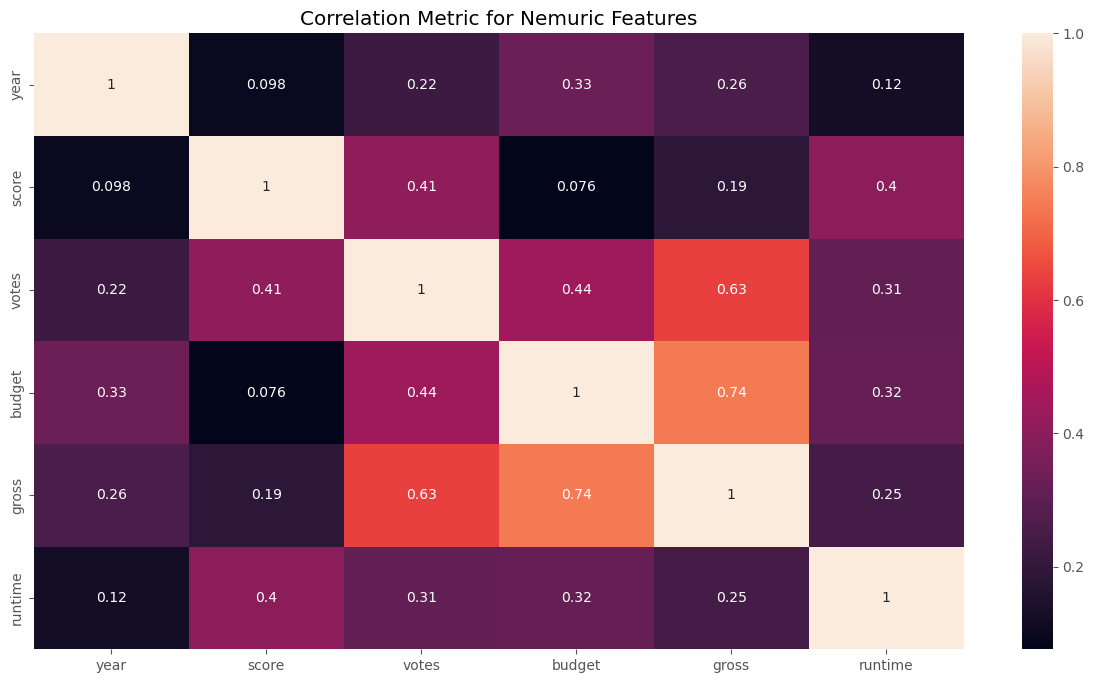

In [21]:
#  Use sns.heatmap() to visualize the correlation matrix more clearly

correlation_matrix = df_cleaned.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Metric for Nemuric Features')

 There is indeed high correlation between budget and gross,
 Which is 0.74

 There is indeed high correlation between votes and gross as well,
 Which is 0.63